In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [95]:
message = [' ' for i in range(100)]
for i in range(100):
    message[i] = chr(int(ord(' ')+((90<<i) | ord('a')>>i ^ i<<2)%90)) # pseudorandom number
str(message)

'[\'A\', \' \', \'0\', \' \', \'6\', \'7\', \'9\', \'<\', \'@\', \'D\', \'H\', \'L\', \'P\', \'T\', \'X\', \'\\\\\', \'`\', \'d\', \'h\', \'l\', \'p\', \'t\', \'x\', \'"\', \'&\', \'*\', \'.\', \'2\', \'6\', \':\', \'>\', \'B\', \'F\', \'J\', \'N\', \'R\', \'V\', \'Z\', \'^\', \'b\', \'f\', \'j\', \'n\', \'r\', \'v\', \' \', \'$\', \'(\', \',\', \'0\', \'4\', \'8\', \'<\', \'@\', \'D\', \'H\', \'L\', \'P\', \'T\', \'X\', \'\\\\\', \'`\', \'d\', \'h\', \'l\', \'p\', \'t\', \'x\', \'"\', \'&\', \'*\', \'.\', \'2\', \'6\', \':\', \'>\', \'B\', \'F\', \'J\', \'N\', \'R\', \'V\', \'Z\', \'^\', \'b\', \'f\', \'j\', \'n\', \'r\', \'v\', \' \', \'$\', \'(\', \',\', \'0\', \'4\', \'8\', \'<\', \'@\', \'D\']'

In [96]:
data_experiment = list()
latency_experiment = list()
throughput_experiment = list()
experiments = 3
for i in range(experiments):
    data = pd.read_csv(f"result_{i}.csv")
    latency = data[['packetSize(bytes)','latency(s)']]
    latency_experiment.append(latency)
    throughput = data[['packetSize(bytes)','throughput(bps)']]
    throughput_experiment.append(data)
    data_experiment.append(data)


In [97]:
latency_chart = pd.DataFrame()
latency_chart['packetSize(bytes)'] = data_experiment[0]['packetSize(bytes)']
throughput_chart = pd.DataFrame()
throughput_chart['packetSize(bytes)'] = data_experiment[0]['packetSize(bytes)']

for i in range(experiments):
    latency_chart['latency(s)'] = latency_experiment[i]['latency(s)']
    latency_chart = latency_chart.rename(columns={'latency(s)': f"experimento_{i}"})
    throughput_chart['throughput(bps)'] = throughput_experiment[i]['throughput(bps)']
    throughput_chart = throughput_chart.rename(columns={'throughput(bps)': f"experimento_{i}"})

latency_chart['mean'] = latency_chart[latency_chart.columns[1:]].mean(axis=1)
throughput_chart['mean'] = throughput_chart[throughput_chart.columns[1:]].mean(axis=1)

Text(0.5, 1.0, 'Latência x tamanho de mensagem > 1KB')

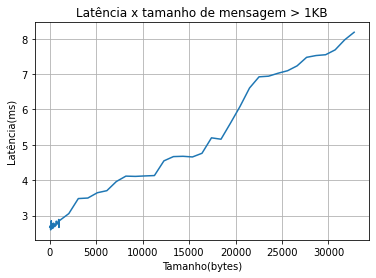

In [104]:
    fig, ax = plt.subplots()
    ax.plot(latency_chart['packetSize(bytes)'], latency_chart['mean'])
    ax.grid(True)
    ax.set_ylabel('Latência(ms)')
    ax.set_xlabel('Tamanho(bytes)')
    ax.set_title('Latência x tamanho de mensagem > 1KB')



Text(0.5, 1.0, 'Latência x tamanho de mensagem menores que 1KB')

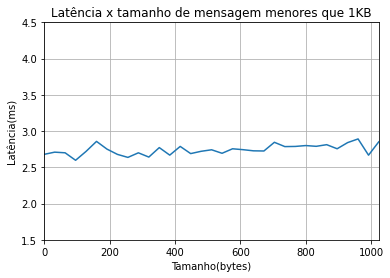

In [106]:

    fig, ax = plt.subplots()
    ax.plot(latency_chart['packetSize(bytes)'], latency_chart['mean'])
    ax.grid(True)
    plt.xlim(0,1024)
    plt.ylim(1.500,4.500)

    ax.set_ylabel('Latência(ms)')
    ax.set_xlabel('Tamanho(bytes)')
    ax.set_title('Latência x tamanho de mensagem menores que 1KB')

In [100]:
latency_chart_view = latency_chart[['packetSize(bytes)', 'mean']]
latency_chart_view=latency_chart_view.rename(columns={'mean':"Latência média"}).style.hide_index()
latency_chart_view.to_excel("latency_chart_view.xlsx")  
latency_chart_view

packetSize(bytes),Latência média
1,2.679950
32,2.709274
64,2.700272
96,2.597079
128,2.719577
160,2.857654
192,2.751190
224,2.678399
256,2.636948
288,2.700100


Text(0.5, 1.0, 'Vazão x tamanho de mensagem')

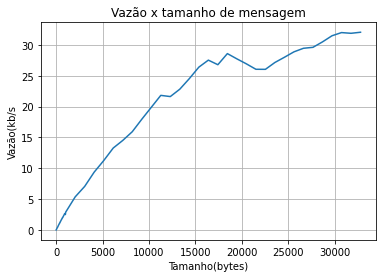

In [101]:
    fig, ax = plt.subplots()
    ax.plot(throughput_chart['packetSize(bytes)'], throughput_chart['mean']/1000)
    ax.grid(True)
    ax.set_ylabel('Vazão(kb/s')
    ax.set_xlabel('Tamanho(bytes)')
    ax.set_title('Vazão x tamanho de mensagem')

In [102]:
throughput_chart_view = throughput_chart[['packetSize(bytes)', 'mean']]
throughput_chart_view=throughput_chart_view.rename(columns={'mean':"Vazão média"}).style.hide_index()
throughput_chart_view
throughput_chart_view.to_excel("throughput_chart_view.xlsx")  

In [103]:
throughput_chart_view

packetSize(bytes),Vazão média
1,3.174932
32,95.059571
64,189.825887
96,296.148997
128,377.288300
160,454.348541
192,558.644145
224,670.675537
256,776.672058
288,855.710612
